# Exploring and Transforming JSON Schemas

# Introduction

In this lesson, you'll formalize how to explore a JSON file whose structure and schema is unknown to you. This often happens in practice when you are handed a file or stumble upon one with little documentation.

## Objectives
You will be able to:
* Use the JSON module to load and parse JSON documents
* Load and explore unknown JSON schemas
* Convert JSON to a pandas dataframe

## Loading the JSON file

Load the data from the file `disease_data.json`.

In [2]:
#Your code here 
import json

file = open('disease_data.json', 'r')
data = json.load(file)

## Explore the first and second levels of the schema hierarchy

In [54]:
#Your code here
print(type(data['meta']))
print(type(data['meta']['view']))
print(type(data['data'][0]))
len(data['meta']['view']['columns'])
data['meta']['view']

<class 'dict'>
<class 'dict'>
<class 'list'>


{'id': 'g4ie-h725',
 'name': 'U.S. Chronic Disease Indicators (CDI)',
 'attribution': 'Centers for Disease Control and Prevention, National Center for Chronic Disease Prevention and Health Promotion, Division of Population Health',
 'attributionLink': 'http://www.cdc.gov/nccdphp/dph/',
 'averageRating': 0,
 'category': 'Chronic Disease Indicators',
 'createdAt': 1463517008,
 'description': "CDC's Division of Population Health provides cross-cutting set of 124 indicators that were developed by consensus and that allows states and territories and large metropolitan areas to uniformly define, collect, and report chronic disease data that are important to public health practice and available for states, territories and large metropolitan areas. In addition to providing access to state-specific indicator data, the CDI web site serves as a gateway to additional information and data resources.",
 'displayType': 'table',
 'downloadCount': 80068,
 'hideFromCatalog': False,
 'hideFromDataJson': 

## Convert to a DataFrame

Create a DataFrame from the JSON file. Be sure to retrive the column names for the dataframe. (Search within the 'meta' key of the master dictionary.) The DataFrame should include all 42 columns.

In [84]:
#Your code here
import pandas as pd

meta_column = data['meta']['view']['columns']
column_name = []
for name in meta_column:
    column_name.append(name['name'])

df = pd.DataFrame(data['data'], columns = column_name)

df['Topic'].value_counts()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60266 entries, 0 to 60265
Data columns (total 42 columns):
sid                          60266 non-null int64
id                           60266 non-null object
position                     60266 non-null int64
created_at                   60266 non-null int64
created_meta                 60266 non-null object
updated_at                   60266 non-null int64
updated_meta                 60266 non-null object
meta                         0 non-null object
YearStart                    60266 non-null object
YearEnd                      60266 non-null object
LocationAbbr                 60266 non-null object
LocationDesc                 60266 non-null object
DataSource                   60266 non-null object
Topic                        60266 non-null object
Question                     60266 non-null object
Response                     0 non-null object
DataValueUnit                60158 non-null object
DataValueType                60266 n

## Level-Up
## Create a bar graph of states with the highest asthma rates for adults age 18+

In [58]:
column_name

['sid',
 'id',
 'position',
 'created_at',
 'created_meta',
 'updated_at',
 'updated_meta',
 'meta',
 'YearStart',
 'YearEnd',
 'LocationAbbr',
 'LocationDesc',
 'DataSource',
 'Topic',
 'Question',
 'Response',
 'DataValueUnit',
 'DataValueType',
 'DataValue',
 'DataValueAlt',
 'DataValueFootnoteSymbol',
 'DatavalueFootnote',
 'LowConfidenceLimit',
 'HighConfidenceLimit',
 'StratificationCategory1',
 'Stratification1',
 'StratificationCategory2',
 'Stratification2',
 'StratificationCategory3',
 'Stratification3',
 'GeoLocation',
 'ResponseID',
 'LocationID',
 'TopicID',
 'QuestionID',
 'DataValueTypeID',
 'StratificationCategoryID1',
 'StratificationID1',
 'StratificationCategoryID2',
 'StratificationID2',
 'StratificationCategoryID3',
 'StratificationID3']

In [69]:

drop_col = ['id', 'meta', 'StratificationCategory2', 'Stratification2', 'StratificationCategory3',
            'Stratification3', 'ResponseID', 'StratificationCategoryID2', 'StratificationID2',
           'StratificationCategoryID3', 'StratificationID3']
df_over18.drop(columns=drop_col, inplace=True)
df_over18.StratificationCategory1.value_counts()
# df_group = df.groupby(by= ('Topic' & '') ).count()
# df_group.iloc[:10, :5]


Race/Ethnicity    540
Gender            220
Overall           110
Name: StratificationCategory1, dtype: int64

In [83]:
cols = ['LocationAbbr', 'LocationDesc', 'DataSource','Topic', 'Question', 'YearStart', 'YearEnd', 'DataValue', 'DataValueTypeID']
df_asthma_aduts = df[(df['StratificationCategory1'] == 'Overall')
                    & (df['Question'] == 'Current asthma prevalence among adults aged >= 18 years')
                    & (df['DataValueTypeID'] == 'CRDPREV')][cols]
df_asthma_aduts.sort_values(by='LocationAbbr')
df_asthma_aduts.head()

,LocationAbbr,LocationDesc,DataSource,Topic,Question,YearStart,YearEnd,DataValue,DataValueTypeID
9370,US,United States,BRFSS,Asthma,Current asthma prevalence among adults aged >=...,2016,2016,9.3,CRDPREV
9371,AL,Alabama,BRFSS,Asthma,Current asthma prevalence among adults aged >=...,2016,2016,9.7,CRDPREV
9372,AK,Alaska,BRFSS,Asthma,Current asthma prevalence among adults aged >=...,2016,2016,8.8,CRDPREV
9373,AZ,Arizona,BRFSS,Asthma,Current asthma prevalence among adults aged >=...,2016,2016,9.4,CRDPREV
9374,AR,Arkansas,BRFSS,Asthma,Current asthma prevalence among adults aged >=...,2016,2016,8.5,CRDPREV


In [82]:
import matplotlib.pyplot as plt
%matplotlib inline


Text(0.5, 0, 'State')

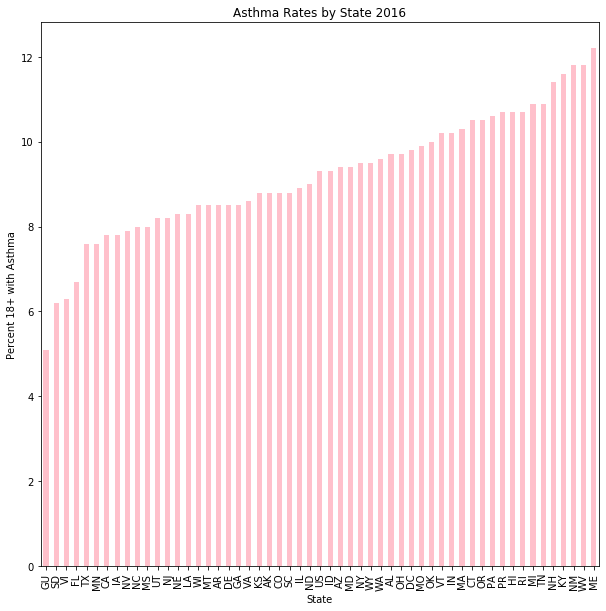

In [95]:
df_asthma_aduts.DataValue = df_asthma_aduts.DataValue.astype(float)
view = df_asthma_aduts.sort_values(by='DataValue')

view.set_index('LocationAbbr')['DataValue'].plot(kind='bar', figsize=(10,10), color = 'pink')
plt.title('Asthma Rates by State 2016')
plt.ylabel('Percent 18+ with Asthma')
plt.xlabel('State')

## Summary

Well done! In this lab you got some extended practice exploring the structure of JSON files, converting json files to pandas DataFrame, and visualizing data!